In [1]:
from IPython.display import Image 
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv('../dataset/음식 영양소.csv',encoding='cp949')
del data['NO']
data

,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g)
0,닭갈비,구이류,육류구이,595.610000,45.900000,25.800000,44.900000,1535.830000,6.000000,0.200000
1,닭꼬치,구이류,육류구이,176.722661,11.561723,8.565014,13.347661,286.911028,2.315328,0.043863
2,더덕구이,구이류,채소류구이,184.000000,3.100000,5.200000,31.100000,743.370000,0.800000,0.000000
3,도미구이,구이류,어패류구이,397.000000,61.100000,16.500000,2.100000,1582.170000,3.800000,0.100000
4,병어구이,구이류,어패류구이,488.000000,54.600000,30.800000,0.200000,1567.940000,8.900000,0.200000
...,...,...,...,...,...,...,...,...,...,...
792,오징어튀김,튀김류,어패류튀김,505.710000,18.560000,32.990000,33.650000,504.990000,5.140000,0.310000
793,채소튀김,튀김류,채소류튀김,404.630000,3.250000,27.140000,36.830000,277.850000,4.290000,0.240000
794,치킨너겟,튀김류,치킨류,468.400000,22.470000,35.420000,14.930000,843.880000,9.170000,0.280000
795,탕수육,튀김류,육류튀김,358.970000,27.210000,16.750000,24.840000,814.660000,3.190000,0.090000


In [3]:
cd = data.iloc[:,3:]
cd.head(1)

,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g)
0,595.61,45.9,25.8,44.9,1535.83,6.0,0.2


In [4]:
scaler = StandardScaler()
# 데이터 학습
scaler.fit(cd)
# 변환
scaler_data = scaler.transform(cd)

In [5]:
sd = pd.DataFrame(scaler_data)
sd.columns = ['에너지','단백질','지방','탄수화물','나트륨','총 포화 지방산','트랜스 지방산']
sd

,에너지,단백질,지방,탄수화물,나트륨,총 포화 지방산,트랜스 지방산
0,1.400240,1.853887,1.228407,0.441934,0.997445,0.838894,0.247161
1,-0.507499,-0.334117,-0.206404,-0.520212,-0.867429,-0.117259,-0.228565
2,-0.474356,-0.873290,-0.486541,0.021121,-0.185848,-0.510479,-0.362210
3,0.495710,2.822417,0.454183,-0.863194,1.066640,0.268005,-0.057525
4,0.910152,2.408243,1.644656,-0.921132,1.045392,1.591429,0.247161
...,...,...,...,...,...,...,...
792,0.990808,0.111807,1.826973,0.098880,-0.541795,0.615729,0.582315
793,0.530460,-0.863732,1.339961,0.195850,-0.880959,0.395158,0.369035
794,0.820887,0.360949,2.029270,-0.471961,-0.035768,1.661493,0.490909
795,0.322510,0.662977,0.474995,-0.169769,-0.079399,0.109714,-0.087993


# 최적 군집수 구하기

In [6]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(sd)
    
    x.append(k)
    y.append(kmeans.inertia_)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


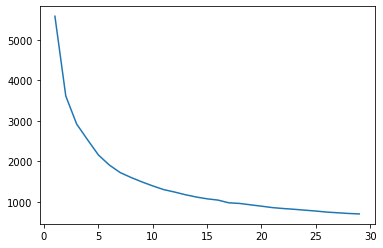

In [7]:
plt.plot(x, y)

# 군집분석

In [8]:
kmeans = KMeans(n_clusters=6,random_state = 0)

In [9]:
kmeans.fit(sd)

KMeans(n_clusters=6, random_state=0)

In [10]:
sd_1 = sd.copy()
sd_1['cluster'] = kmeans.predict(sd)

In [11]:
sd_1.head() #표준화된 데이터에 군집포함시킨 데이터

,에너지,단백질,지방,탄수화물,나트륨,총 포화 지방산,트랜스 지방산,cluster
0,1.400240,1.853887,1.228407,0.441934,0.997445,0.838894,0.247161,1
1,-0.507499,-0.334117,-0.206404,-0.520212,-0.867429,-0.117259,-0.228565,0
2,-0.474356,-0.873290,-0.486541,0.021121,-0.185848,-0.510479,-0.362210,0
3,0.495710,2.822417,0.454183,-0.863194,1.066640,0.268005,-0.057525,5
4,0.910152,2.408243,1.644656,-0.921132,1.045392,1.591429,0.247161,1


In [12]:
final_data = data.copy()
final_data['cluster'] = sd_1['cluster']
final_data.head(5) #원본데이터에 군집포함시킨 데이터

,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g),cluster
0,닭갈비,구이류,육류구이,595.610000,45.900000,25.800000,44.900000,1535.830000,6.000000,0.200000,1
1,닭꼬치,구이류,육류구이,176.722661,11.561723,8.565014,13.347661,286.911028,2.315328,0.043863,0
2,더덕구이,구이류,채소류구이,184.000000,3.100000,5.200000,31.100000,743.370000,0.800000,0.000000,0
3,도미구이,구이류,어패류구이,397.000000,61.100000,16.500000,2.100000,1582.170000,3.800000,0.100000,5
4,병어구이,구이류,어패류구이,488.000000,54.600000,30.800000,0.200000,1567.940000,8.900000,0.200000,1


# 부족한 영양소 추출

In [13]:
def info(height, weight, age, sex, food):
    food_kcal = 0
    kcal = 0 
    food_carbo = 0
    food_protein = 0
    food_fat = 0
    food_tofat = 0
    food_transfat = 0
    food_na = 0
    if sex == 0:
        kcal = (6.25*height)+(10*weight)-(5*age)+5
        '''
        if exercise == 0:
            kcal = kcal*1
        elif exercise == 1:
            kcal = kcal*1.11
        elif exercise == 2:
            kcal = kcal*1.25
        elif exercise == 3:
            kcal = kcal*1.48
        '''    
    else :
        kcal = (6.25*height)+(10*weight)-(5*age)-161
        '''
        if exercise == 0:
            kcal = kcal*1
        elif exercise == 1:
            kcal = kcal*1.11
        elif exercise == 2:
            kcal = kcal*1.25
        elif exercise == 3:
            kcal = kcal*1.48 
        '''

    for i in food:
        cond = (data['식품명']==i)
        food_kcal += data.loc[cond]['에너지(㎉)'].item()
        food_carbo += data.loc[cond]['탄수화물(g)'].item()*4
        food_protein += data.loc[cond]['단백질(g)'].item()*4
        food_fat += data.loc[cond]['지방(g)'].item()*9
        food_na += data.loc[cond]['나트륨(㎎)'].item()
        food_tofat += data.loc[cond]['총 포화 지방산(g)'].item()*9
        food_transfat += data.loc[cond]['트랜스 지방산(g)'].item()*9
      
    
    
    if kcal*0.65<food_carbo:
        food_carbo = 0
    else:
        food_carbo = kcal*0.65 - food_carbo
        
    if kcal*0.2<food_protein:
        food_protein = 0
    else:
        food_protein = kcal*0.2 - food_protein
        
    if kcal*0.3<food_fat:
        food_fat = 0
    else:
        food_fat = kcal*0.3 - food_fat
        
    if kcal*0.06<food_tofat:
        food_tofat = 0
    else:
        food_tofat = kcal*0.06 - food_tofat
        
    if kcal*0.01<food_transfat:
        food_transfat = 0
    else:
        food_transfat = kcal*0.01 - food_transfat
    kcal = kcal-(food_kcal)
    
    
    if food_na > 3000:
        food_na = 0
    else:
        food_na = 3000-food_na
    
   
    return [kcal,food_carbo/4,food_protein/4, food_fat/9, food_na, food_tofat/9, food_transfat/9]

# 메뉴 추천 test 해보기

In [14]:
food = ['곰탕','훈제오리'] #먹은 음식
test = pd.DataFrame(info(183, 74, 27, 0, food)).transpose()
test.columns = ['에너지(㎉)','탄수화물(g)','단백질(g)','지방(g)','나트륨(㎎)','총 포화 지방산(g)','트랜스 지방산(g)']
test_df = pd.concat([cd,test])
test_df = test_df.reset_index(drop=True)
print(test) #부족한 영양소 데이터
test_df # 부족한 영양소 데이터를 추가시킨 데이터프레임

       에너지(㎉)     탄수화물(g)     단백질(g)  지방(g)       나트륨(㎎)  총 포화 지방산(g)  \
0  811.460258  272.246043  24.059408    0.0  1035.552886          0.0   

   트랜스 지방산(g)  
0    1.278286  


,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g)
0,595.610000,45.900000,25.800000,44.900000,1535.830000,6.000000,0.200000
1,176.722661,11.561723,8.565014,13.347661,286.911028,2.315328,0.043863
2,184.000000,3.100000,5.200000,31.100000,743.370000,0.800000,0.000000
3,397.000000,61.100000,16.500000,2.100000,1582.170000,3.800000,0.100000
4,488.000000,54.600000,30.800000,0.200000,1567.940000,8.900000,0.200000
...,...,...,...,...,...,...,...
793,404.630000,3.250000,27.140000,36.830000,277.850000,4.290000,0.240000
794,468.400000,22.470000,35.420000,14.930000,843.880000,9.170000,0.280000
795,358.970000,27.210000,16.750000,24.840000,814.660000,3.190000,0.090000
796,530.040000,35.470000,33.670000,21.290000,386.810000,6.380000,0.240000


In [15]:
# 데이터 학습
scaler.fit(test_df)
# 변환
scaler_test = scaler.transform(test_df)

test_1 = pd.DataFrame(scaler_test)
test_1.columns = ['에너지','단백질','지방','탄수화물','나트륨','총 포화 지방산','트랜스 지방산']
test_1 # test_df를 표준화 시킨 데이터프레임

,에너지,단백질,지방,탄수화물,나트륨,총 포화 지방산,트랜스 지방산
0,1.393180,1.854222,1.229679,0.418924,0.997718,0.840049,0.241009
1,-0.508998,-0.334861,-0.205271,-0.512606,-0.868253,-0.116395,-0.231336
2,-0.475951,-0.874300,-0.485436,0.011502,-0.186272,-0.509734,-0.364031
3,0.491287,2.823230,0.455380,-0.844675,1.066953,0.268987,-0.061511
4,0.904521,2.408852,1.645969,-0.900769,1.045692,1.592813,0.241009
...,...,...,...,...,...,...,...
793,0.525935,-0.864737,1.341244,0.180671,-0.881790,0.396178,0.362017
794,0.815517,0.360547,2.030621,-0.465890,-0.036103,1.662898,0.483025
795,0.318592,0.662725,0.476194,-0.173314,-0.079760,0.110647,-0.091763
796,1.095425,1.189304,1.884919,-0.278122,-0.718997,0.938687,0.362017


In [16]:
import random
######### 부족한 영양소 데이터와 음식 영양소 데이터들 간의 유클리디안 거리 구하기 #########
lst = []
for i in range(len(test_1)-1):
    
    lst.append(np.sqrt(sum((test_1.iloc[i]-test_1.iloc[len(test_1)-1])**2)))
    
print(lst.index(min(lst))) # 유클리디안 거리가 가장 짧은 행번호
print(final_data.iloc[lst.index(min(lst))]['cluster']) #가장 가까운 거리에 있는 데이터의 군집 번호
cluster_num = final_data.iloc[lst.index(min(lst))]['cluster'] #선택된 군집 번호

food_classfier1 = '밥류'#식품대분류

food_classfier2 = '기타 밥류'#식품상세분류

cond = (final_data['cluster'] == cluster_num) & (final_data['식품대분류'] == food_classfier1) & (final_data['식품상세분류'] == food_classfier2)

cluster_list = list(final_data.loc[cond]['식품명'])
random.seed(0)
food_5 = random.sample(cluster_list,5)
print(food_5)
final_data.loc[(final_data['식품명'].isin(food_5))]

427
3
['짬뽕밥', '콩나물밥', '순대국밥', '알밥', '영양돌솥밥']


,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g),cluster
463,순대국밥,밥류,기타 밥류,673.09,28.56,20.56,93.46,1137.58,11.33,0.08,3
464,알밥,밥류,기타 밥류,422.13,15.61,16.86,51.99,1418.08,1.96,0.10,3
465,영양돌솥밥,밥류,기타 밥류,643.16,12.02,10.03,126.22,21.94,2.12,0.05,3
475,짬뽕밥,밥류,기타 밥류,647.70,28.81,12.56,104.86,2105.68,2.06,0.07,3
486,콩나물밥,밥류,기타 밥류,392.17,14.98,5.07,71.66,868.99,1.33,0.02,3


In [30]:
######### 군집구분없이 가장 가까운 메뉴 3개 추천########
lst = []
lst2 = []
for i in range(len(test_1)-1):
    
    lst.append(np.sqrt(sum((test_1.iloc[i]-test_1.iloc[len(test_1)-1])**2)))
    
    
top_3_index = pd.DataFrame(lst).sort_values(by=0)[:3].index
final_data.iloc[top_3_index]

,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g),cluster
427,우동(일식),면 및 만두류,국수류,1264.19000,14.270000,25.750000,243.830000,1252.920000,2.390000,0.290000,3
188,잣죽,죽 및 스프류,죽류,874.48169,19.179342,19.629272,155.275219,878.812855,1.986861,0.236987,3
472,잡채밥,밥류,덮밥류,825.15000,22.110000,18.810000,141.850000,1247.220000,2.270000,0.280000,3


# k-medois 군집분석

### 최적군집수

In [40]:
from sklearn_extra.cluster import KMedoids

In [41]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 30):
    kmedoids = KMedoids(n_clusters = k)
    kmedoids.fit(sd)
    
    x.append(k)
    y.append(kmedoids.inertia_)

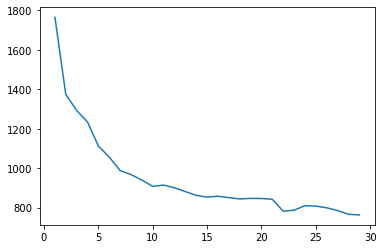

In [43]:
plt.plot(x, y)

In [47]:
kmedoids = KMedoids(n_clusters=6,random_state = 0).fit(sd)

In [49]:
final_data_kmedois = data.copy()
final_data_kmedois['cluster'] = kmedoids.predict(sd)
final_data_kmedois.head(5) #원본데이터에 군집포함시킨 데이터

,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g),cluster
0,닭갈비,구이류,육류구이,595.610000,45.900000,25.800000,44.900000,1535.830000,6.000000,0.200000,0
1,닭꼬치,구이류,육류구이,176.722661,11.561723,8.565014,13.347661,286.911028,2.315328,0.043863,5
2,더덕구이,구이류,채소류구이,184.000000,3.100000,5.200000,31.100000,743.370000,0.800000,0.000000,4
3,도미구이,구이류,어패류구이,397.000000,61.100000,16.500000,2.100000,1582.170000,3.800000,0.100000,0
4,병어구이,구이류,어패류구이,488.000000,54.600000,30.800000,0.200000,1567.940000,8.900000,0.200000,0


In [50]:
food = ['곰탕','훈제오리'] #먹은 음식
test = pd.DataFrame(info(183, 74, 27, 0, food)).transpose()
test.columns = ['에너지(㎉)','탄수화물(g)','단백질(g)','지방(g)','나트륨(㎎)','총 포화 지방산(g)','트랜스 지방산(g)']
test_df = pd.concat([cd,test])
test_df = test_df.reset_index(drop=True)
print(test) #부족한 영양소 데이터
test_df # 부족한 영양소 데이터를 추가시킨 데이터프레임

       에너지(㎉)     탄수화물(g)     단백질(g)  지방(g)       나트륨(㎎)  총 포화 지방산(g)  \
0  811.460258  272.246043  24.059408    0.0  1035.552886          0.0   

   트랜스 지방산(g)  
0    1.278286  


,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g)
0,595.610000,45.900000,25.800000,44.900000,1535.830000,6.000000,0.200000
1,176.722661,11.561723,8.565014,13.347661,286.911028,2.315328,0.043863
2,184.000000,3.100000,5.200000,31.100000,743.370000,0.800000,0.000000
3,397.000000,61.100000,16.500000,2.100000,1582.170000,3.800000,0.100000
4,488.000000,54.600000,30.800000,0.200000,1567.940000,8.900000,0.200000
...,...,...,...,...,...,...,...
793,404.630000,3.250000,27.140000,36.830000,277.850000,4.290000,0.240000
794,468.400000,22.470000,35.420000,14.930000,843.880000,9.170000,0.280000
795,358.970000,27.210000,16.750000,24.840000,814.660000,3.190000,0.090000
796,530.040000,35.470000,33.670000,21.290000,386.810000,6.380000,0.240000


In [51]:
# 데이터 학습
scaler.fit(test_df)
# 변환
scaler_test = scaler.transform(test_df)

test_1 = pd.DataFrame(scaler_test)
test_1.columns = ['에너지','단백질','지방','탄수화물','나트륨','총 포화 지방산','트랜스 지방산']
test_1 # test_df를 표준화 시킨 데이터프레임

,에너지,단백질,지방,탄수화물,나트륨,총 포화 지방산,트랜스 지방산
0,1.393180,1.854222,1.229679,0.418924,0.997718,0.840049,0.241009
1,-0.508998,-0.334861,-0.205271,-0.512606,-0.868253,-0.116395,-0.231336
2,-0.475951,-0.874300,-0.485436,0.011502,-0.186272,-0.509734,-0.364031
3,0.491287,2.823230,0.455380,-0.844675,1.066953,0.268987,-0.061511
4,0.904521,2.408852,1.645969,-0.900769,1.045692,1.592813,0.241009
...,...,...,...,...,...,...,...
793,0.525935,-0.864737,1.341244,0.180671,-0.881790,0.396178,0.362017
794,0.815517,0.360547,2.030621,-0.465890,-0.036103,1.662898,0.483025
795,0.318592,0.662725,0.476194,-0.173314,-0.079760,0.110647,-0.091763
796,1.095425,1.189304,1.884919,-0.278122,-0.718997,0.938687,0.362017


In [55]:
import random
######### 부족한 영양소 데이터와 음식 영양소 데이터들 간의 유클리디안 거리 구하기 #########
lst = []
for i in range(len(test_1)-1):
    
    lst.append(np.sqrt(sum((test_1.iloc[i]-test_1.iloc[len(test_1)-1])**2)))
    
print(lst.index(min(lst))) # 유클리디안 거리가 가장 짧은 행번호
print(final_data_kmedois.iloc[lst.index(min(lst))]['cluster']) #가장 가까운 거리에 있는 데이터의 군집 번호
cluster_num = final_data_kmedois.iloc[lst.index(min(lst))]['cluster'] #선택된 군집 번호

# food_classfier1 = '밥류'#식품대분류

# food_classfier2 = '기타 밥류'#식품상세분류

# cond = (final_data_kmedois['cluster'] == cluster_num) & (final_data_kmedois['식품대분류'] == food_classfier1) & (final_data_kmedois['식품상세분류'] == food_classfier2)

# cluster_list = list(final_data_kmedois.loc[cond]['식품명'])
# random.seed(0)
# food_5 = random.sample(cluster_list,5)
# print(food_5)
# final_data_kmedois.loc[(final_data['식품명'].isin(food_5))]

427
1
['짬뽕밥', '콩나물밥', '소고기국밥', '알밥', '영양돌솥밥']


,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g),cluster
104,소고기국밥,밥류,기타 밥류,330.53,21.80,8.10,42.60,1786.31,2.30,0.10,1
464,알밥,밥류,기타 밥류,422.13,15.61,16.86,51.99,1418.08,1.96,0.10,1
465,영양돌솥밥,밥류,기타 밥류,643.16,12.02,10.03,126.22,21.94,2.12,0.05,1
475,짬뽕밥,밥류,기타 밥류,647.70,28.81,12.56,104.86,2105.68,2.06,0.07,1
486,콩나물밥,밥류,기타 밥류,392.17,14.98,5.07,71.66,868.99,1.33,0.02,1


## kmeans와 kmedoids로 나눈 군집의 교집합 구하기

In [157]:
# cond1 = final_data['cluster'] == 3
# cond2 = final_data_kmedois['cluster'] == 1
# bool_df = pd.DataFrame(final_data.loc[cond1]['식품명']).isin(list(final_data_kmedois.loc[cond2]['식품명']))
# cond3 =  bool_df['식품명'] == True
# same_index = bool_df.loc[cond3].index
# final_data_mix = final_data.iloc[same_index] # kmeans와 kmedoids 을 통한 추천메뉴군집
# final_data_mix.head(1)

## 오차범위 내의 음식 고르기

In [154]:
#test

In [155]:
# final_data['총 포화 지방산(g)'].std()
# final_data.std()

In [156]:
# if test['에너지(㎉)'].iloc[0] == 0:
#     ra1 = final_data_mix['에너지(㎉)']<=final_data['에너지(㎉)'].std()
# else:
#     ra1 = (final_data_mix['에너지(㎉)']>=test['에너지(㎉)'].iloc[0]*0.95) & (final_data_mix['에너지(㎉)']<=test['에너지(㎉)'].iloc[0]*1.05)

# if test['탄수화물(g)'].iloc[0] == 0:
#     ra2 = final_data_mix['탄수화물(g)']<=final_data['탄수화물(g)'].std()
# else:
#     ra2 = (final_data_mix['탄수화물(g)']>=test['탄수화물(g)'].iloc[0]*0.95) & (final_data_mix['탄수화물(g)']<=test['탄수화물(g)'].iloc[0]*1.05)
    
# if test['단백질(g)'].iloc[0] == 0:
#     ra3 = final_data_mix['단백질(g)']<=final_data['단백질(g)'].std()
# else:
#     ra3 = (final_data_mix['단백질(g)']>=test['단백질(g)'].iloc[0]*0.95) & (final_data_mix['단백질(g)']<=test['단백질(g)'].iloc[0]*1.05)
    
# if test['지방(g)'].iloc[0] == 0:
#     ra4 = final_data_mix['지방(g)']<=final_data['지방(g)'].std()
# else:
#     ra4 = (final_data_mix['지방(g)']>=test['지방(g)'].iloc[0]*0.95) & (final_data_mix['지방(g)']<=test['지방(g)'].iloc[0]*1.05)
    
# if test['나트륨(㎎)'].iloc[0] == 0:
#     ra5 = final_data_mix['나트륨(㎎)']<=final_data['나트륨(㎎)'].std()
# else:
#     ra5 = (final_data_mix['나트륨(㎎)']>=test['나트륨(㎎)'].iloc[0]*0.95) & (final_data_mix['나트륨(㎎)']<=test['나트륨(㎎)'].iloc[0]*1.05)
    
# if test['총 포화 지방산(g)'].iloc[0] == 0:
#     ra6 = final_data_mix['총 포화 지방산(g)']<=final_data['총 포화 지방산(g)'].std()
# else:
#     ra6 = (final_data_mix['총 포화 지방산(g)']>=test['총 포화 지방산(g)'].iloc[0]*0.95) & (final_data_mix['총 포화 지방산(g)']<=test['총 포화 지방산(g)'].iloc[0]*1.05)
    
# if test['트랜스 지방산(g)'].iloc[0] == 0:
#     ra7 = final_data_mix['트랜스 지방산(g)']<=final_data['트랜스 지방산(g)'].std()
# else:
#     ra7 = (final_data_mix['트랜스 지방산(g)']>=test['트랜스 지방산(g)'].iloc[0]*0.95) & (final_data_mix['트랜스 지방산(g)']<=test['트랜스 지방산(g)'].iloc[0]*1.05)

# final_data_mix.loc[ra1 | ra2 | ra3]

# 계층적 군집분석

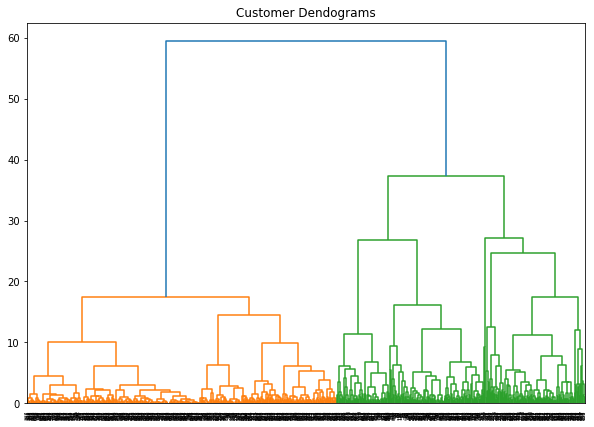

In [108]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(sd, method='ward'))

In [121]:
from sklearn.cluster import AgglomerativeClustering

hcluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hcluster.fit_predict(sd)

array([1, 0, 0, 4, 5, 3, 1, 1, 1, 4, 5, 2, 0, 2, 2, 2, 0, 0, 4, 5, 4, 0,
       4, 5, 0, 4, 4, 0, 4, 4, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 4, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 4, 0, 0, 0, 4, 2, 2, 2, 2, 2, 4, 4, 1, 4, 0, 0, 1, 4,
       0, 4, 0, 4, 5, 5, 0, 0, 0, 0, 1, 1, 4, 1, 0, 0, 1, 4, 0, 4, 4, 4,
       4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 5, 1, 1, 1, 1, 1, 2,
       5, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 5, 5, 1, 3, 1, 5, 4, 5, 4, 1, 1, 1, 0, 0, 5, 5, 1,
       0, 0, 1, 4, 1, 1, 5, 1, 0, 4, 0, 4, 4, 5, 0,

In [122]:
final_data_hclust = data.copy()
final_data_hclust['cluster'] =hcluster.fit_predict(sd)
final_data_hclust.head(5) #원본데이터에 군집포함시킨 데이터

,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g),cluster
0,닭갈비,구이류,육류구이,595.610000,45.900000,25.800000,44.900000,1535.830000,6.000000,0.200000,1
1,닭꼬치,구이류,육류구이,176.722661,11.561723,8.565014,13.347661,286.911028,2.315328,0.043863,0
2,더덕구이,구이류,채소류구이,184.000000,3.100000,5.200000,31.100000,743.370000,0.800000,0.000000,0
3,도미구이,구이류,어패류구이,397.000000,61.100000,16.500000,2.100000,1582.170000,3.800000,0.100000,4
4,병어구이,구이류,어패류구이,488.000000,54.600000,30.800000,0.200000,1567.940000,8.900000,0.200000,5


In [159]:
import random
######### 부족한 영양소 데이터와 음식 영양소 데이터들 간의 유클리디안 거리 구하기 #########
lst = []
for i in range(len(test_1)-1):
    
    lst.append(np.sqrt(sum((test_1.iloc[i]-test_1.iloc[len(test_1)-1])**2)))
    
print(lst.index(min(lst))) # 유클리디안 거리가 가장 짧은 행번호
print(final_data_hclust.iloc[lst.index(min(lst))]['cluster']) #가장 가까운 거리에 있는 데이터의 군집 번호
cluster_num = final_data_hclust.iloc[lst.index(min(lst))]['cluster'] #선택된 군집 번호

# food_classfier1 = '밥류'#식품대분류

# food_classfier2 = '기타 밥류'#식품상세분류

# cond = (final_data_hclust['cluster'] == cluster_num) & (final_data_hclust['식품대분류'] == food_classfier1) & (final_data_hclust['식품상세분류'] == food_classfier2)

# cluster_list = list(final_data_hclust.loc[cond]['식품명'])
# random.seed(0)
# food_5 = random.sample(cluster_list,5)
# print(food_5)
# final_data_hclust.loc[(final_data['식품명'].isin(food_5))]

427
2


### 3가지 군집결과 합치기

In [151]:
cond1 = final_data['cluster'] == 3
cond2 = final_data_kmedois['cluster'] == 1
cond3 = final_data_hclust['cluster'] == 2
bool_df = set(list(final_data.loc[cond1]['식품명']))&set(list(final_data_kmedois.loc[cond2]['식품명']))&set(list(final_data_hclust.loc[cond3]['식품명']))
print(list(bool_df))
final_data_mix = final_data.loc[final_data['식품명'].isin(list(bool_df))] # kmeans, kmedoids, hclust 을 통한 추천메뉴군집
final_data_mix

['간자장', '짬뽕밥', '물냉면', '콩국수', '채소볶음밥', '우동(중식)', '굴국밥', '문어초밥', '생선초밥(광어)', '라면', '참치죽', '삼선짬뽕', '카레라이스', '해물칼국수', '캘리포니아롤', '굴짬뽕', '깨죽', '돈까스김밥', '둘깨칼국수', '콩나물국밥', '농어초밥', '소고기버섯죽', '잣죽', '쫄면', '잡채밥', '연어롤', '기스면', '삼선우동', '오일소스스파게티', '떡라면', '낙지덮밥', '찐빵', '자장면', '생선초밥(모듬)', '회덮밥', '순대볶음', '잡탕밥', '채소떡볶이', '장어초밥', '어묵잡채', '돌솥비빔밥', '짜장밥', '류산슬덮밥', '생선물회', '칼국수', '떡만두국', '모듬회덮밥', '육회비빔밥', '회냉면', '한치초밥', '비빔냉면', '삼선자장면', '샐러드김밥', '송이덮밥', '표고버섯볶음밥', '게살죽', '짜장면', '막국수', '오징어덮밥', '채소김밥', '우동(일식)', '떡국', '고추김밥', '달걀라면', '참치덮밥', '닭고기덮밥', '연어초밥', '닭칼국수', '순대', '생선모듬초밥', '날치알김밥', '김치우동', '수제비', '하이라이스', '토마토소스스파게티', '바지락칼국수', '충무김밥', '간짜장', '콩나물밥', '볶음밥', '소고기김밥', '쟁반국수', '순댓국', '영양돌솥밥', '해물토마토소스스파게티', '김치라면', '떡강정', '참치볶음밥', '짬뽕', '열무김치국수', '알밥', '비빔국수', '떡만둣국', '열무냉면', '새우초밥', '새우튀김롤', '울면']


,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g),cluster
11,굴국밥,국 및 탕류,어패류국.탕,683.000000,42.400000,17.800000,88.400000,1635.390000,3.900000,0.100000,3
13,떡만둣국,국 및 탕류,기타 국류,624.915135,20.055076,11.318709,110.706614,1980.190254,3.436106,0.076914,3
33,생선물회,회류,회류,577.970000,34.300000,12.300000,82.500000,2779.740000,2.000000,0.000000,3
55,간자장,면 및 만두류,중식면류,824.539261,22.333534,22.034172,134.224395,2716.201099,9.709596,0.241643,3
56,굴짬뽕,면 및 만두류,중식면류,680.671706,32.868725,9.604787,115.688430,2662.346222,1.410844,0.039348,3
...,...,...,...,...,...,...,...,...,...,...,...
528,어묵잡채,볶음류,어패류볶음,414.120000,6.550000,10.590000,73.150000,1201.200000,1.800000,0.080000,3
542,채소떡볶이,볶음류,떡볶이류,515.290000,6.240000,3.760000,114.110000,537.970000,0.770000,0.040000,3
565,찐빵,빵류,앙금빵류,532.430000,12.980000,0.310000,119.430000,585.270000,0.420000,0.000000,3
769,순대,찜류,육류찜,410.530000,6.040000,8.000000,78.600000,1327.970000,2.460000,0.050000,3


## 최종군집안에서 메뉴 추천

In [158]:
food_classfier1 = '밥류'#식품대분류

food_classfier2 = '기타 밥류'#식품상세분류

cond =(final_data_mix['식품대분류'] == food_classfier1) & (final_data_mix['식품상세분류'] == food_classfier2)
cluster_list = list(final_data_mix.loc[cond]['식품명'])
random.seed(0)
food_1 = random.sample(cluster_list,1)
print(food_1)
final_data.loc[(final_data['식품명'].isin(food_1))]

['콩나물국밥']


,식품명,식품대분류,식품상세분류,에너지(㎉),단백질(g),지방(g),탄수화물(g),나트륨(㎎),총 포화 지방산(g),트랜스 지방산(g),cluster
485,콩나물국밥,밥류,기타 밥류,403.26,11.34,1.89,85.22,1339.02,0.91,0.0,3


## 군집 상관없이 가장 가까운 메뉴 추천

In [184]:
import random
######### 부족한 영양소 데이터와 음식 영양소 데이터들 간의 유클리디안 거리 구하기 #########
lst = []
for i in range(len(test_1)-1):
    
    lst.append(np.sqrt(sum((test_1.iloc[i]-test_1.iloc[len(test_1)-1])**2)))
    
final_data2 = final_data.copy()
final_data2['거리'] = lst


food_classfier1 = '밥류'#식품대분류

food_classfier2 = '기타 밥류'#식품상세분류

cond =(final_data2['식품대분류'] == food_classfier1) & (final_data2['식품상세분류'] == food_classfier2)


cond2 = final_data2.loc[cond]['거리'] == final_data2.loc[cond]['거리'].min()
print(final_data2.loc[cond&cond2])

#print(final_data.iloc[lst.index(min(lst))]['식품명']) #가장 가까운 거리에 있는 음식

       식품명 식품대분류 식품상세분류  에너지(㎉)  단백질(g)  지방(g)  탄수화물(g)  나트륨(㎎)  총 포화 지방산(g)  \
465  영양돌솥밥    밥류  기타 밥류  643.16   12.02  10.03   126.22   21.94         2.12   

     트랜스 지방산(g)  cluster        거리  
465        0.05        3  6.071268  
